# Diabetes Readmission Prediction (Binary Classification)

## Data Source
J. Clore, K. Cios, J. DeShazo, and B. Strack. "Diabetes 130-US Hospitals for Years 1999-2008," UCI Machine Learning Repository, 2014.

[Online]. Available: https://doi.org/10.24432/C5230J.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/diabetic_data.csv", na_values='?')
print(f"Original Dataset Shape: {df.shape}")

Original Dataset Shape: (101766, 50)


C:\Users\uzair\AppData\Local\Temp\ipykernel_12964\1834955363.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/diabetic_data.csv", na_values='?')


In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),NaN,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

## Data Preprocessing and Cleaning 

In [6]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [7]:
cols_to_drop = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 
                'medical_specialty', 'examide', 'citoglipton']
# drop 'weight' (98k missing), 'payer_code' (40k missing), 'medical_specialty' (49k missing)
df.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')

In [8]:
# drop rows where 'race' (2k missing) or 'diag_1' (21 missing) are null
df.dropna(subset=['race', 'diag_1', 'diag_2', 'diag_3'], inplace=True)

In [9]:
# For A1C and Glucose, "Missing" means "Test Not Done", which is a valid category.
df['max_glu_serum'] = df['max_glu_serum'].fillna('None')
df['A1Cresult'] = df['A1Cresult'].fillna('None')

In [10]:
# Discharge IDs 11, 13, 19, 20, 21 = Expired. They cannot be readmitted.
dead_ids = [11, 13, 19, 20, 21]
df = df[~df['discharge_disposition_id'].isin(dead_ids)]

In [11]:
print(f"Shape after Cleaning: {df.shape}")

Shape after Cleaning: (96041, 43)


## Feature Reducation

In [12]:
# (the 20+ rare medications, secondary diagnoses) will be dropped.

features_to_keep = [
    # 1. Demographics
    'race', 
    'gender', 
    'age', 
    
    # 2. Administrative / Interaction
    'admission_type_id', 
    'discharge_disposition_id', 
    'time_in_hospital', 
    
    # 3. Clinical Metrics (The "How Sick?" Factors)
    'num_lab_procedures', 
    'num_procedures', 
    'num_medications', 
    'number_diagnoses', 
    
    # 4. History (The strongest predictors)
    'number_outpatient', 
    'number_emergency', 
    'number_inpatient', 
    
    # 5. Key Diabetes Indicators
    'max_glu_serum', 
    'A1Cresult', 
    'insulin',        # Keep Insulin (it's critical)
    'change',         # Did meds change? (Critical for readmission)
    'diabetesMed',    # Is patient on any meds?
    
    # 6. Target
    'readmitted'
]

# Create the reduced dataframe
df_reduced = df[features_to_keep].copy()

print(f"Old Feature Count: {df.shape[1]}")
print(f"New Feature Count: {df_reduced.shape[1]}")
print("\nYour Final Features:")
print(df_reduced.columns.tolist())

Old Feature Count: 43
New Feature Count: 19

Your Final Features:
['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses', 'number_outpatient', 'number_emergency', 'number_inpatient', 'max_glu_serum', 'A1Cresult', 'insulin', 'change', 'diabetesMed', 'readmitted']


In [13]:
df_reduced['target'] = df_reduced['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

In [14]:
df_reduced.head()

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,number_outpatient,number_emergency,number_inpatient,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,target
1,Caucasian,Female,[10-20),1,1,3,59,0,18,9,0,0,0,None,None,Up,Ch,Yes,>30,0
2,AfricanAmerican,Female,[20-30),1,1,2,11,5,13,6,2,0,1,None,None,No,No,Yes,NO,0
3,Caucasian,Male,[30-40),1,1,2,44,1,16,7,0,0,0,None,None,Up,Ch,Yes,NO,0
4,Caucasian,Male,[40-50),1,1,1,51,0,8,5,0,0,0,None,None,Steady,Ch,Yes,NO,0
5,Caucasian,Male,[50-60),2,1,3,31,6,16,9,0,0,0,None,None,Steady,No,Yes,>30,0


In [15]:
import seaborn as sns
sns.set(style="whitegrid", context="talk")

C:\Users\uzair\AppData\Local\Temp\ipykernel_12964\3674306303.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=df_reduced, palette='coolwarm')


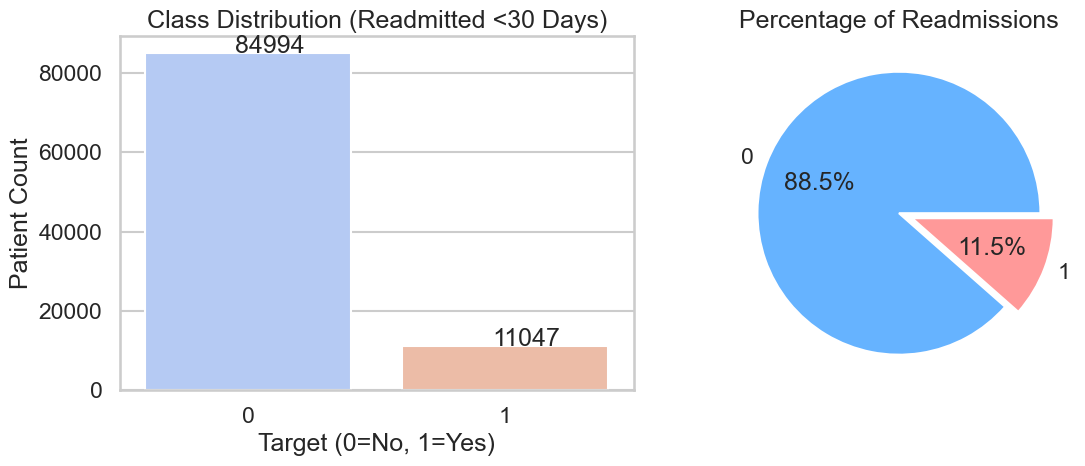

In [16]:
plt.figure(figsize=(12, 5))

# Subplot 1: Count Plot
plt.subplot(1, 2, 1)
ax = sns.countplot(x='target', data=df_reduced, palette='coolwarm')
plt.title('Class Distribution (Readmitted <30 Days)')
plt.xlabel('Target (0=No, 1=Yes)')
plt.ylabel('Patient Count')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + 0.35, p.get_height() + 100))

# Subplot 2: Pie Chart
plt.subplot(1, 2, 2)
df_reduced['target'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], explode=(0, 0.1))
plt.title('Percentage of Readmissions')
plt.ylabel('')  # Hide y-label
plt.tight_layout()
plt.show()

C:\Users\uzair\AppData\Local\Temp\ipykernel_12964\259017835.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='target', y='number_inpatient', data=df_reduced, palette='Reds')


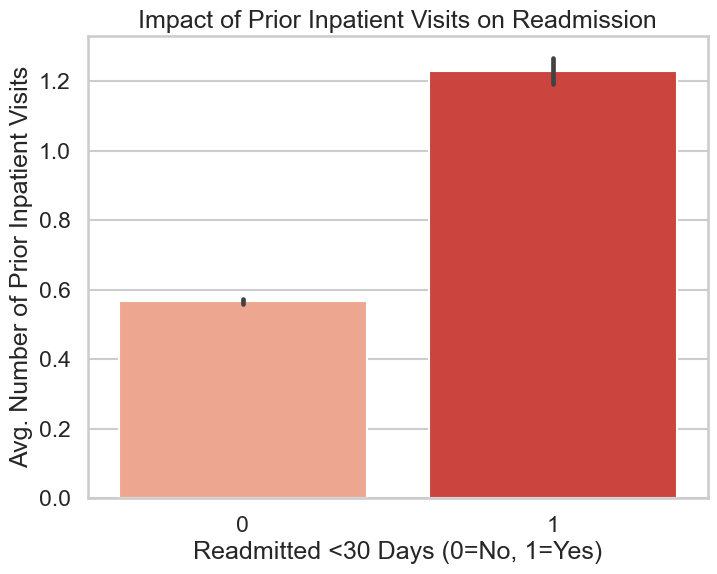

In [17]:
# Justification: "Analyzing if prior history predicts future risk."
plt.figure(figsize=(8, 6))
sns.barplot(x='target', y='number_inpatient', data=df_reduced, palette='Reds')
plt.title('Impact of Prior Inpatient Visits on Readmission')
plt.xlabel('Readmitted <30 Days (0=No, 1=Yes)')
plt.ylabel('Avg. Number of Prior Inpatient Visits')
plt.show()

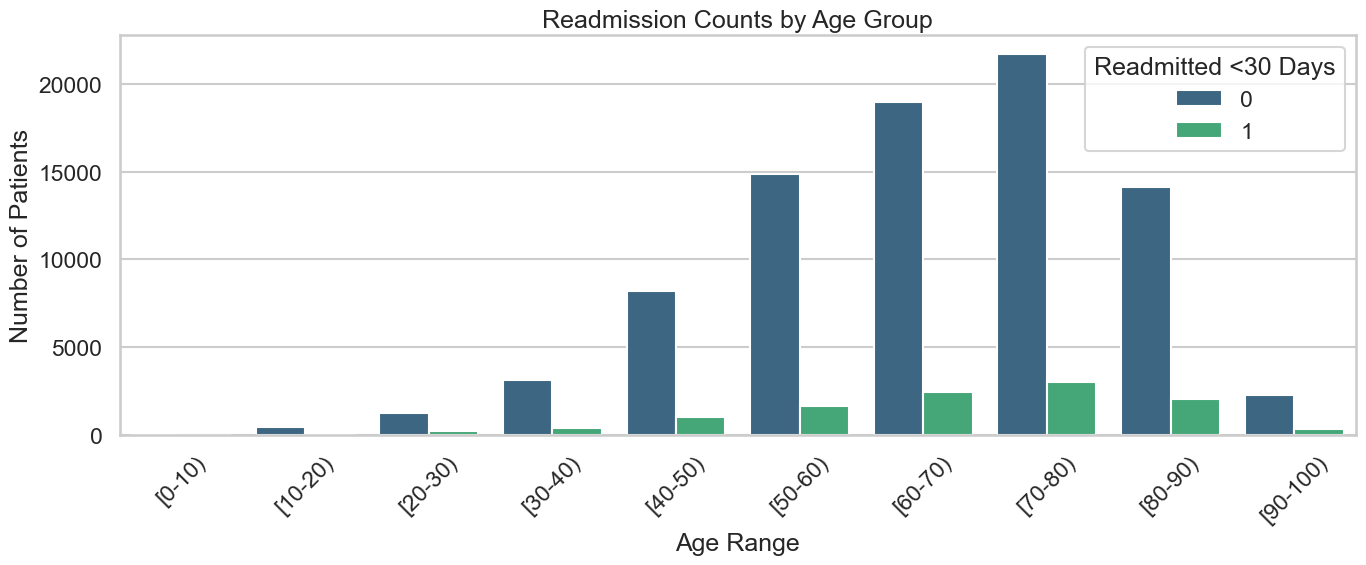

In [18]:
plt.figure(figsize=(14, 6))
age_order = sorted(df_reduced['age'].unique()) # Sort ages logicially
sns.countplot(x='age', hue='target', data=df_reduced, order=age_order, palette='viridis')
plt.title('Readmission Counts by Age Group')
plt.xlabel('Age Range')
plt.ylabel('Number of Patients')
plt.legend(title='Readmitted <30 Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

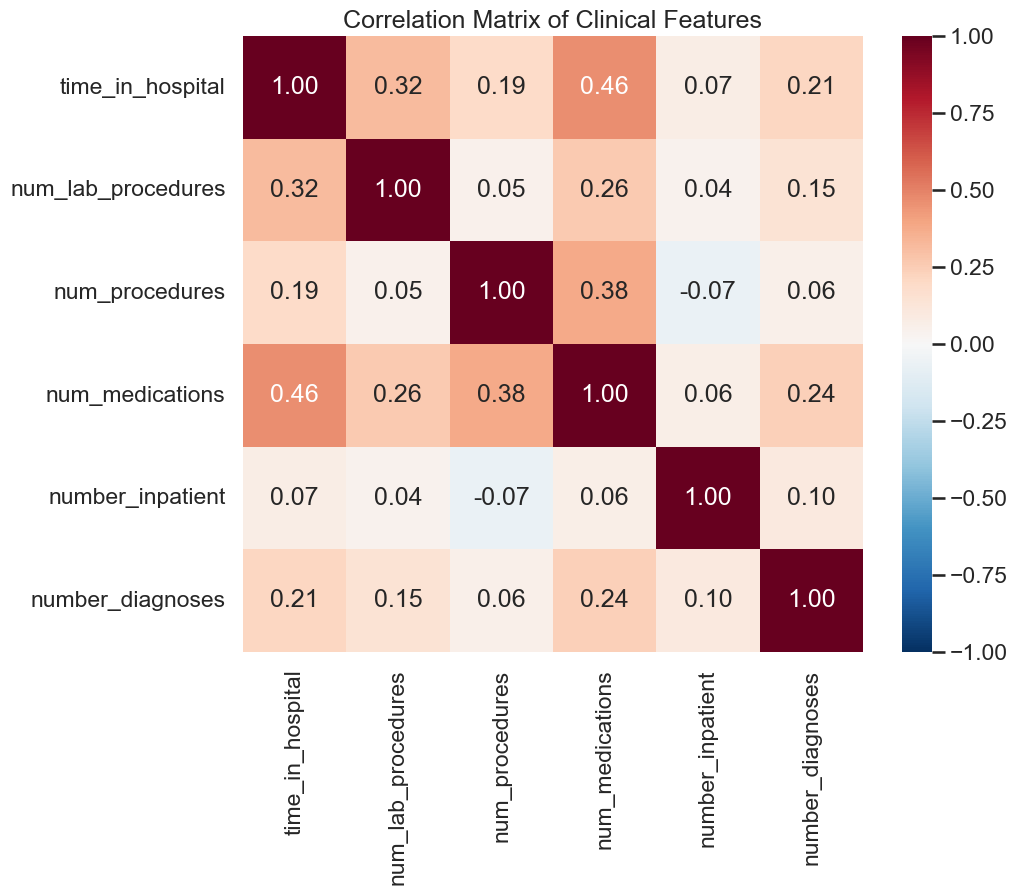

In [19]:
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
numeric_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                'num_medications', 'number_inpatient', 'number_diagnoses']
corr = df_reduced[numeric_cols].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu_r', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Clinical Features')
plt.show()

C:\Users\uzair\AppData\Local\Temp\ipykernel_12964\1466941137.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_reduced[df_reduced['target'] == 0]['time_in_hospital'], label='Not Readmitted', shade=True, color='blue')
C:\Users\uzair\AppData\Local\Temp\ipykernel_12964\1466941137.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_reduced[df_reduced['target'] == 1]['time_in_hospital'], label='Readmitted', shade=True, color='red')


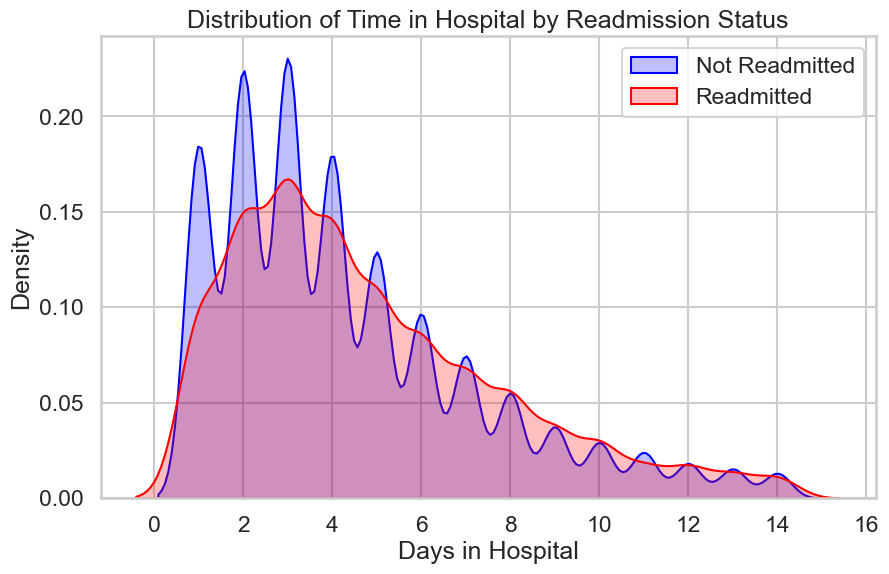

In [20]:
# Justification: "Do readmitted patients stay longer initially?"
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_reduced[df_reduced['target'] == 0]['time_in_hospital'], label='Not Readmitted', shade=True, color='blue')
sns.kdeplot(data=df_reduced[df_reduced['target'] == 1]['time_in_hospital'], label='Readmitted', shade=True, color='red')
plt.title('Distribution of Time in Hospital by Readmission Status')
plt.xlabel('Days in Hospital')
plt.ylabel('Density')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

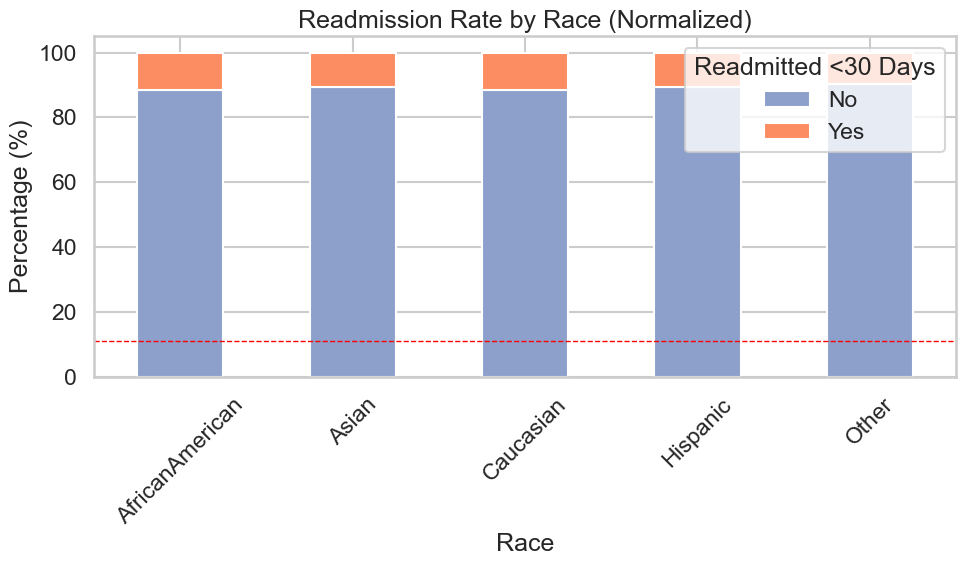

In [21]:
race_ct = pd.crosstab(df_reduced['race'], df_reduced['target'], normalize='index') * 100

plt.figure(figsize=(10, 6))
# Plot 'No Readmission' (0) and 'Readmission' (1)
race_ct.plot(kind='bar', stacked=True, color=['#8da0cb', '#fc8d62'], figsize=(10,6))

plt.title('Readmission Rate by Race (Normalized)')
plt.xlabel('Race')
plt.ylabel('Percentage (%)')
plt.legend(title='Readmitted <30 Days', labels=['No', 'Yes'], loc='upper right')
plt.xticks(rotation=45)
plt.axhline(y=11, color='red', linestyle='--', linewidth=1, label='Avg Readmission Rate (~11%)') # Benchmark line
plt.tight_layout()
plt.show()

C:\Users\uzair\AppData\Local\Temp\ipykernel_12964\2859482590.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gender', y='target', data=df_reduced, palette='pastel', ci=None)
C:\Users\uzair\AppData\Local\Temp\ipykernel_12964\2859482590.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='target', data=df_reduced, palette='pastel', ci=None)


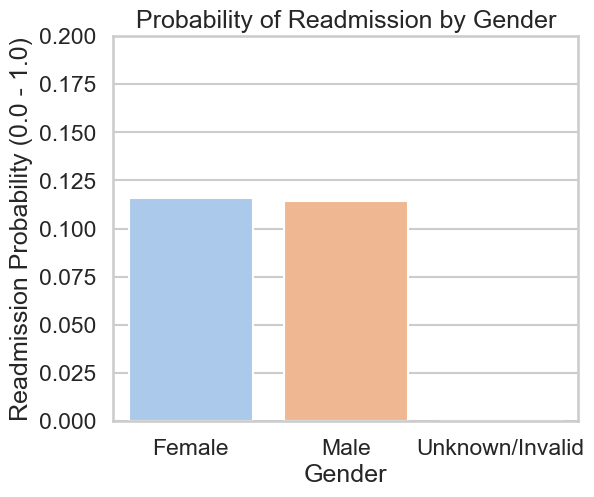

In [22]:
plt.figure(figsize=(6, 5))
sns.barplot(x='gender', y='target', data=df_reduced, palette='pastel', ci=None)
plt.title('Probability of Readmission by Gender')
plt.ylabel('Readmission Probability (0.0 - 1.0)')
plt.xlabel('Gender')
plt.ylim(0, 0.2) # Zoom in to see the difference
plt.show()

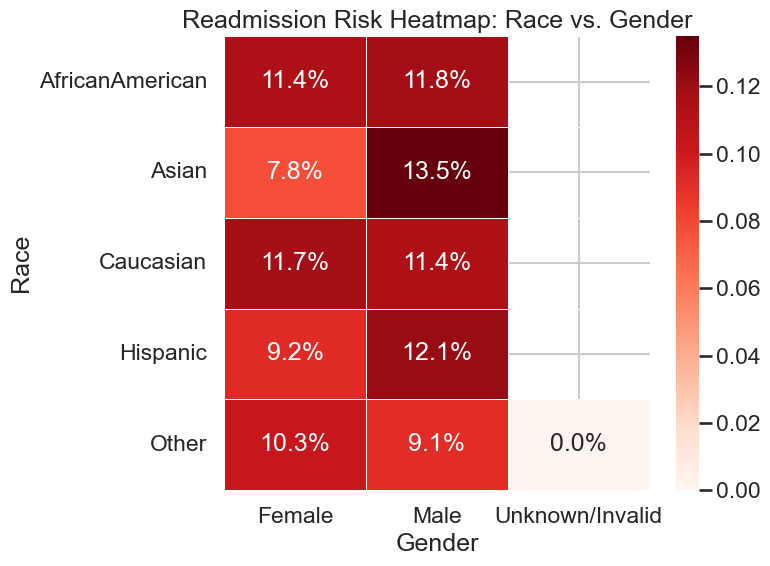

In [23]:
pivot_table = df_reduced.pivot_table(index='race', columns='gender', values='target', aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1%", cmap='Reds', linewidths=.5)
plt.title('Readmission Risk Heatmap: Race vs. Gender')
plt.ylabel('Race')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

## Preparing Data for Modeling 

In [24]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96041 entries, 1 to 101765
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      96041 non-null  object
 1   gender                    96041 non-null  object
 2   age                       96041 non-null  object
 3   admission_type_id         96041 non-null  int64 
 4   discharge_disposition_id  96041 non-null  int64 
 5   time_in_hospital          96041 non-null  int64 
 6   num_lab_procedures        96041 non-null  int64 
 7   num_procedures            96041 non-null  int64 
 8   num_medications           96041 non-null  int64 
 9   number_diagnoses          96041 non-null  int64 
 10  number_outpatient         96041 non-null  int64 
 11  number_emergency          96041 non-null  int64 
 12  number_inpatient          96041 non-null  int64 
 13  max_glu_serum             96041 non-null  object
 14  A1Cresult                 

In [25]:
df_reduced.head()

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,number_outpatient,number_emergency,number_inpatient,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,target
1,Caucasian,Female,[10-20),1,1,3,59,0,18,9,0,0,0,None,None,Up,Ch,Yes,>30,0
2,AfricanAmerican,Female,[20-30),1,1,2,11,5,13,6,2,0,1,None,None,No,No,Yes,NO,0
3,Caucasian,Male,[30-40),1,1,2,44,1,16,7,0,0,0,None,None,Up,Ch,Yes,NO,0
4,Caucasian,Male,[40-50),1,1,1,51,0,8,5,0,0,0,None,None,Steady,Ch,Yes,NO,0
5,Caucasian,Male,[50-60),2,1,3,31,6,16,9,0,0,0,None,None,Steady,No,Yes,>30,0


In [26]:
df_reduced['age'] = df_reduced['age'].astype(str).str.strip()
age_mapping = {
    '[0-10)': 5,
    '[10-20)': 15,
    '[20-30)': 25,
    '[30-40)': 35,
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95
}

# Apply the mapping
# This turns the 'age' column from text strings into integers
df_reduced['age'] = df_reduced['age'].replace(age_mapping)

print("Age column converted to numbers!")
print("Unique values in Age:", df_reduced['age'].unique())

Age column converted to numbers!
Unique values in Age: [15 25 35 45 55 65 75 85 95  5]


C:\Users\uzair\AppData\Local\Temp\ipykernel_12964\2022349230.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_reduced['age'] = df_reduced['age'].replace(age_mapping)


In [27]:
df_reduced.head()

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,number_outpatient,number_emergency,number_inpatient,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,target
1,Caucasian,Female,15,1,1,3,59,0,18,9,0,0,0,None,None,Up,Ch,Yes,>30,0
2,AfricanAmerican,Female,25,1,1,2,11,5,13,6,2,0,1,None,None,No,No,Yes,NO,0
3,Caucasian,Male,35,1,1,2,44,1,16,7,0,0,0,None,None,Up,Ch,Yes,NO,0
4,Caucasian,Male,45,1,1,1,51,0,8,5,0,0,0,None,None,Steady,Ch,Yes,NO,0
5,Caucasian,Male,55,2,1,3,31,6,16,9,0,0,0,None,None,Steady,No,Yes,>30,0


In [28]:
df_reduced.to_csv("final_data.csv")

## PREPARE DATA FOR MODELING

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

In [29]:
X = df_reduced.drop(['readmitted', 'target'], axis=1)
y = df_reduced['target']

In [30]:
# Convert IDs to string so they become categories, not numbers.
X['admission_type_id'] = X['admission_type_id'].astype(str)
X['discharge_disposition_id'] = X['discharge_disposition_id'].astype(str)

In [31]:
X_encoded = pd.get_dummies(X, drop_first=True)

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,number_outpatient,number_emergency,number_inpatient,race_Asian,...,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,insulin_No,insulin_Steady,insulin_Up,change_No,diabetesMed_Yes
1,15,3,59,0,18,9,0,0,0,False,...,True,False,False,True,False,False,False,True,False,True
2,25,2,11,5,13,6,2,0,1,False,...,True,False,False,True,False,True,False,False,True,True
3,35,2,44,1,16,7,0,0,0,False,...,True,False,False,True,False,False,False,True,False,True
4,45,1,51,0,8,5,0,0,0,False,...,True,False,False,True,False,False,True,False,False,True
5,55,3,31,6,16,9,0,0,0,False,...,True,False,False,True,False,False,True,False,True,True


### Spliting Data into train and test!!

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [35]:
print(f"Training on {X_train.shape[0]} patients. Testing on {X_test.shape[0]} patients.")
print(f"Total Features after encoding: {X_train.shape[1]}")

Training on 76832 patients. Testing on 19209 patients.
Total Features after encoding: 54


### Base Model Traning

In [41]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

results = []

In [42]:
print(f"Training {len(models)} models on {X_train.shape[0]} samples...\n")

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] # Probability for ROC-AUC
    
    # Calculate Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)
    
    # Store in list
    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1-Score": f1,
        "Recall": recall,
        "Precision": precision,
        "ROC-AUC": roc
    })

# Convert to DataFrame for easy viewing
results_df = pd.DataFrame(results)

Training 3 models on 76832 samples...

Training Logistic Regression...


C:\Users\uzair\.conda\envs\ai-env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Random Forest...
Training Gradient Boosting...


### Base Model Performace 

In [43]:
print("\n" + "="*40)
print("     MODEL PERFORMANCE COMPARISON")
print("="*40)
print(results_df.round(3))


     MODEL PERFORMANCE COMPARISON
                 Model  Accuracy  F1-Score  Recall  Precision  ROC-AUC
0  Logistic Regression     0.675     0.269   0.520      0.182    0.658
1        Random Forest     0.885     0.016   0.008      0.474    0.639
2    Gradient Boosting     0.884     0.019   0.010      0.382    0.666


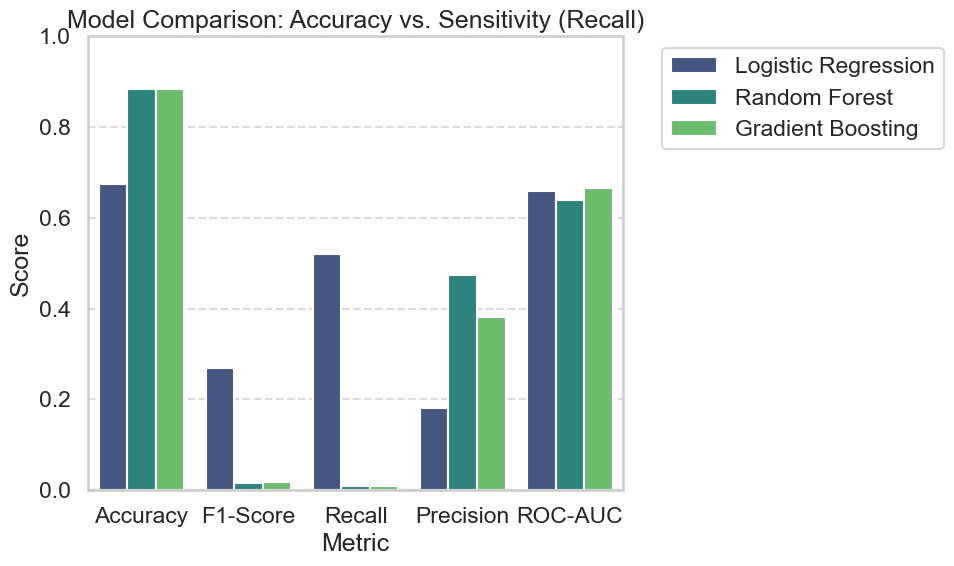

In [44]:
df_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(10, 6))
sns.barplot(x="Metric", y="Score", hue="Model", data=df_melted, palette="viridis")
plt.title("Model Comparison: Accuracy vs. Sensitivity (Recall)")
plt.ylim(0, 1) # Metrics are 0-1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Fine tunning LR

In [46]:
from sklearn.model_selection import GridSearchCV

print("Starting Grid Search... (This finds the best 'C' and 'penalty')")

# Define the model (Keep class_weight='balanced'!)
lr = LogisticRegression(max_iter=5000, class_weight='balanced', random_state=42)

# Define the parameters to test
# 'C': Controls regularization (smaller = stronger simple model, larger = complex model)
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'] # 'liblinear' is often better for smaller/binary datasets
}

grid = GridSearchCV(lr, param_grid, cv=3, scoring='recall', n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print(f"\nBest Parameters Found: {grid.best_params_}")

Starting Grid Search... (This finds the best 'C' and 'penalty')

Best Parameters Found: {'C': 0.01, 'solver': 'lbfgs'}


In [47]:
# Get probabilities instead of just Yes/No
y_probs = best_model.predict_proba(X_test)[:, 1]

# Test thresholds from 0.3 to 0.7
thresholds = np.arange(0.3, 0.75, 0.05)
results = []

for thresh in thresholds:
    # Apply custom threshold
    y_custom_pred = (y_probs >= thresh).astype(int)
    
    # Calculate metrics
    rec = recall_score(y_test, y_custom_pred)
    acc = accuracy_score(y_test, y_custom_pred)
    prec = precision_score(y_test, y_custom_pred)
    
    results.append({'Threshold': thresh, 'Recall': rec, 'Accuracy': acc, 'Precision': prec})

# Convert to dataframe for easy viewing
thresh_df = pd.DataFrame(results)

print("\n" + "="*40)
print("     THRESHOLD PERFORMANCE TABLE")
print("="*40)
print(thresh_df.round(3))


     THRESHOLD PERFORMANCE TABLE
   Threshold  Recall  Accuracy  Precision
0       0.30   0.998     0.125      0.116
1       0.35   0.959     0.202      0.122
2       0.40   0.852     0.373      0.138
3       0.45   0.692     0.550      0.161
4       0.50   0.530     0.676      0.184
5       0.55   0.387     0.764      0.212
6       0.60   0.282     0.818      0.246
7       0.65   0.196     0.846      0.269
8       0.70   0.126     0.864      0.289


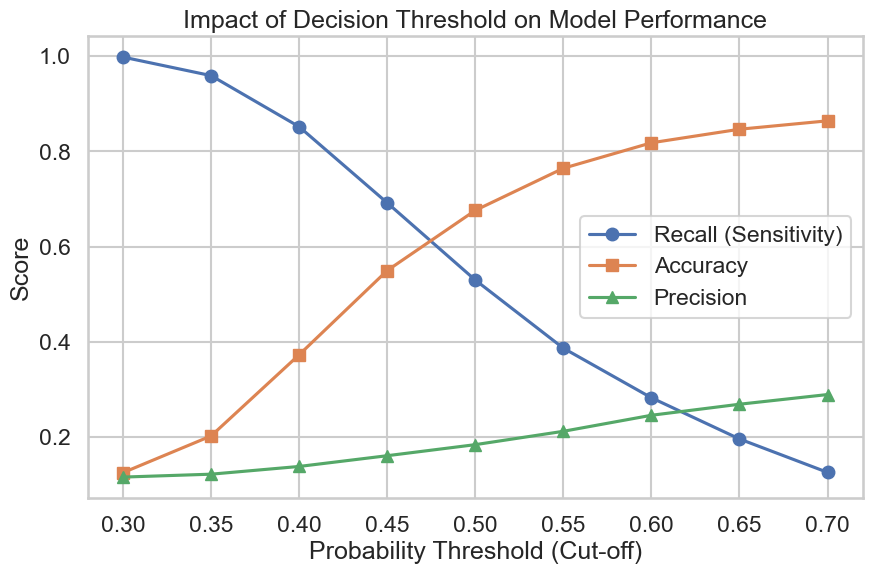

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(thresh_df['Threshold'], thresh_df['Recall'], marker='o', label='Recall (Sensitivity)')
plt.plot(thresh_df['Threshold'], thresh_df['Accuracy'], marker='s', label='Accuracy')
plt.plot(thresh_df['Threshold'], thresh_df['Precision'], marker='^', label='Precision')

plt.title('Impact of Decision Threshold on Model Performance')
plt.xlabel('Probability Threshold (Cut-off)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


Final Evaluation at Threshold 0.5:
Recall: 52.97%
Confusion Matrix:


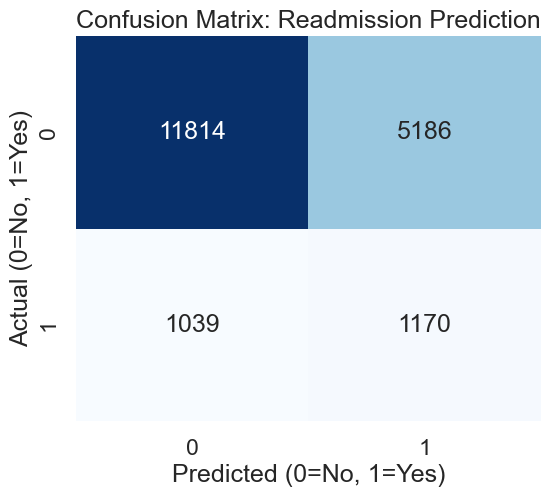

In [51]:

# Let's say we pick 0.45 as the balanced "Sweet Spot" (Adjust based on graph!)
optimal_thresh = 0.50  # Change this number based on the table/graph above!
final_preds = (y_probs >= optimal_thresh).astype(int)

print(f"\nFinal Evaluation at Threshold {optimal_thresh}:")
print(f"Recall: {recall_score(y_test, final_preds):.2%}")
print("Confusion Matrix:")
cm1=confusion_matrix(y_test, final_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted (0=No, 1=Yes)')
plt.ylabel('Actual (0=No, 1=Yes)')
plt.title('Confusion Matrix: Readmission Prediction')
plt.show()


### Fine tunning RFC

In [36]:
print("\nTraining Random Forest Model... (This may take 10-20 seconds)")

rf_model = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    max_depth=20,           # Limit depth to prevent overfitting
    min_samples_leaf=5,     # Require at least 5 patients per leaf
    class_weight='balanced',# Handle the fact that readmissions are rare
    random_state=42
)

rf_model.fit(X_train, y_train)


Training Random Forest Model... (This may take 10-20 seconds)


RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=5, random_state=42)


     FINAL MODEL RESULTS     
Accuracy:  80.01%
ROC-AUC:   0.655

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88     17000
           1       0.23      0.32      0.27      2209

    accuracy                           0.80     19209
   macro avg       0.57      0.59      0.58     19209
weighted avg       0.83      0.80      0.81     19209



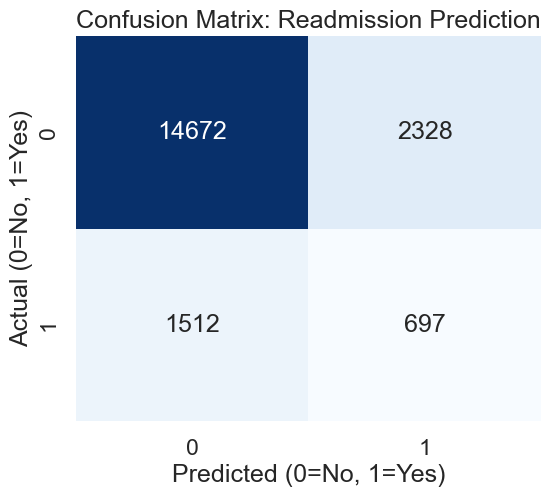

In [37]:
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1] # Probability for ROC curve

# A. Metrics
accuracy = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

print("\n" + "="*30)
print("     FINAL MODEL RESULTS     ")
print("="*30)
print(f"Accuracy:  {accuracy:.2%}")
print(f"ROC-AUC:   {roc:.3f}") 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# B. Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted (0=No, 1=Yes)')
plt.ylabel('Actual (0=No, 1=Yes)')
plt.title('Confusion Matrix: Readmission Prediction')
plt.show()

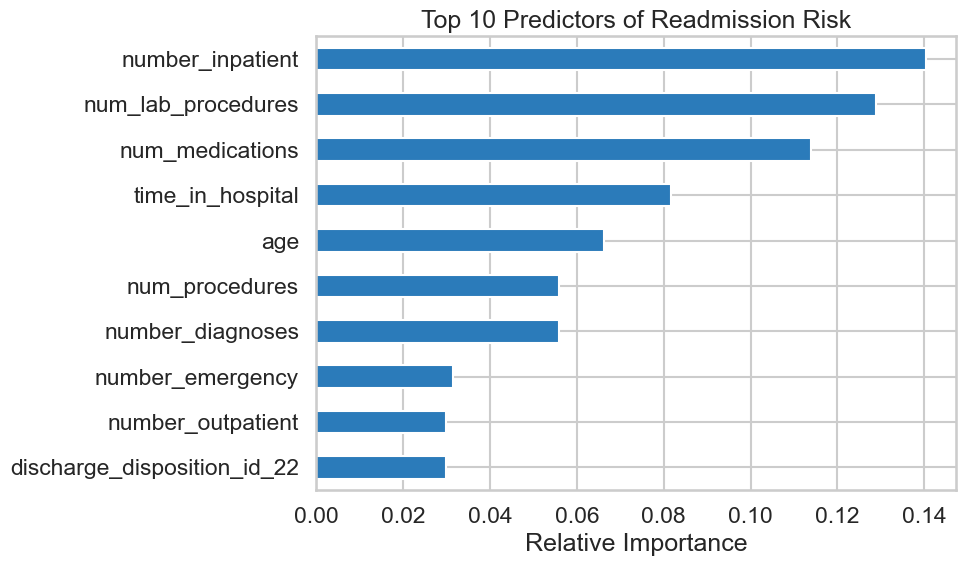

In [38]:
# C. Feature Importance Plot (CRITICAL FOR REPORT)
# This explains "Why" the model made its decisions
importances = pd.Series(rf_model.feature_importances_, index=X_encoded.columns)

plt.figure(figsize=(10,6))
importances.nlargest(10).plot(kind='barh', color='#2b7bba')
plt.title('Top 10 Predictors of Readmission Risk')
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis() # Flip so top feature is at top
plt.tight_layout()
plt.show()